In [3]:
import numpy as np
import pandas as pd
from sklearn import ensemble, cross_validation, learning_curve, metrics, linear_model
import scipy
from statsmodels.stats.weightstats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('diamonds.txt', sep = '\t', header = 0)

In [4]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [8]:
data.isnull().values.any()

False

In [10]:
target=data['price'].values
target[:10]

array([326, 326, 327, 334, 335, 336, 336, 337, 337, 338])

In [11]:
data1=data.drop('price',axis=1)
data1.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [12]:
model=ensemble.RandomForestRegressor(random_state=1)

In [13]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data1, target, 
                                                                                     test_size = 0.25, random_state = 1)

In [14]:
model.fit(train_data,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [15]:
metrics.mean_absolute_error(model.predict(test_data),test_labels)

803.61433830813019

In [16]:
from sklearn.preprocessing import StandardScaler, scale

In [18]:
print scale(data)

[[-1.19816781 -0.17409151 -1.09967199 -0.90409516 -1.58783745 -1.53619556
  -1.57112919]
 [-1.24036129 -1.36073849  1.58552871 -0.90409516 -1.64132529 -1.65877419
  -1.74117497]
 [-1.19816781 -3.38501862  3.37566251 -0.9038445  -1.49869105 -1.45739502
  -1.74117497]
 [-1.07158736  0.45413336  0.24292836 -0.90208985 -1.36497146 -1.31730516
  -1.28771955]
 [-1.02939387  1.08235823  0.24292836 -0.90183918 -1.24016651 -1.21223777
  -1.11767377]
 [-1.17707106  0.73334442 -0.20460509 -0.90158852 -1.59675209 -1.5537068
  -1.50027678]
 [-1.17707106  0.3843306  -0.20460509 -0.90158852 -1.58783745 -1.53619556
  -1.51444726]
 [-1.13487758  0.10511955 -1.09967199 -0.90133785 -1.48086177 -1.42237255
  -1.42942437]
 [-1.21926455  2.33880797  1.58552871 -0.90133785 -1.65915457 -1.71130788
  -1.4861063 ]
 [-1.19816781 -1.63994954  1.58552871 -0.90108719 -1.54326425 -1.47490625
  -1.62781111]]


In [20]:
scaler=StandardScaler()
scaler.fit(train_data,train_labels)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
sc_train_data=scaler.transform(train_data)

In [28]:
sc_test_data=scaler.transform(test_data)

In [29]:
model.fit(sc_train_data,train_labels)
metrics.mean_absolute_error(model.predict(sc_test_data),test_labels)

802.77575856344038

In [38]:
model2=linear_model.SGDRegressor()
model2.fit(sc_train_data,train_labels)
metrics.mean_absolute_error(model2.predict(sc_test_data),test_labels)

909.41702450734851

In [35]:
model2.fit(train_data,train_labels)
metrics.mean_absolute_error(model2.predict(test_data),test_labels)

1417106975686.2825

In [50]:
cv_RF_score=cross_validation.cross_val_score(model,data,target,scoring='mean_absolute_error',cv=20)

/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sampl

In [51]:
cv_SGD_score=cross_validation.cross_val_score(model2,scale(data),target,scoring='mean_absolute_error',cv=20)

/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/ipython2/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sampl

In [52]:
cv_RF_score.mean(),cv_SGD_score.mean()

(-193.95073971078978, -4.5225314419649632)

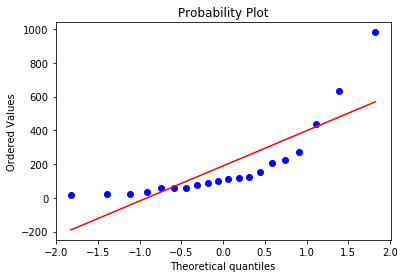

In [53]:
stats.probplot(cv_SGD_score-cv_RF_score, dist = "norm", plot = pylab)
pylab.show()

In [55]:
stats.shapiro(cv_SGD_score - cv_RF_score)

(0.6871877312660217, 2.7320522349327803e-05)

In [56]:
stats.ttest_rel(cv_SGD_score, cv_RF_score)

Ttest_relResult(statistic=3.5091831173235066, pvalue=0.0023459390306397976)

In [37]:
DescrStatsW(mod_forest - mod_line).tconfint_mean()

(-98.849770256265643, -72.497265650111572)

In [57]:
DescrStatsW(cv_SGD_score - cv_RF_score).tconfint_mean()

(76.445276562340752, 302.41113997530886)